In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline


In [2]:
import tensorflow as tf
from tensorflow import keras

2023-11-20 12:29:10.304284: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-20 12:29:10.388442: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-20 12:29:10.388484: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-20 12:29:10.390119: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-11-20 12:29:10.401872: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-20 12:29:10.402383: I tensorflow/core/platform/cpu_feature_guard.cc:1

In [3]:
tf.__version__


'2.15.0'

In [4]:
from tensorflow.keras.preprocessing.image import load_img 

In [5]:
path = '/home/brandon/ML Zoomcamp/WK 8/clothing-dataset-small/train'
name = '5f0a3fa0-6a3d-4b68-b213-72766a643de7.jpg'
fullname = f'{path}/t-shirt/{name}'

In [6]:
fullname

'/home/brandon/ML Zoomcamp/WK 8/clothing-dataset-small/train/t-shirt/5f0a3fa0-6a3d-4b68-b213-72766a643de7.jpg'

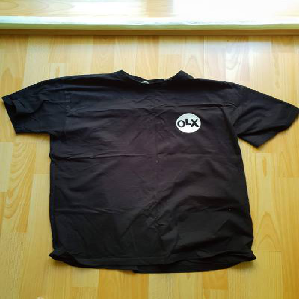

In [7]:
load_img(fullname, target_size=(299, 299))

In [8]:
img = load_img(fullname, target_size=(299, 299))

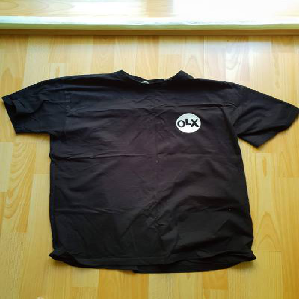

In [9]:
img

In [10]:
x = np.array(img)
x.shape

(299, 299, 3)

In [11]:
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.applications.xception import preprocess_input
from tensorflow.keras.applications.xception import decode_predictions

In [12]:
model = Xception(weights='imagenet', input_shape=(299, 299, 3))

In [13]:
X = np.array([x])

In [14]:
X.shape

(1, 299, 299, 3)

In [15]:
X = preprocess_input(X)

In [16]:
pred = model.predict(X)

1/1 [==============================] - 1s 1s/step


In [17]:
pred

array([[3.23798129e-04, 1.57364542e-04, 2.14056170e-04, 1.52957611e-04,
        2.46566022e-04, 3.04462854e-04, 3.23487940e-04, 1.47259721e-04,
        2.04866199e-04, 1.48656502e-04, 1.95694345e-04, 2.11569408e-04,
        7.61279516e-05, 1.14591749e-04, 1.64077646e-04, 2.07021701e-04,
        1.96368303e-04, 1.44514925e-04, 1.40078817e-04, 1.73651919e-04,
        7.50313688e-04, 2.55688996e-04, 2.66563176e-04, 2.96250073e-04,
        3.71849543e-04, 2.81153742e-04, 2.16760003e-04, 2.26842138e-04,
        3.82646656e-04, 1.72123357e-04, 3.08604445e-04, 1.97759771e-04,
        3.93642345e-04, 4.78196336e-04, 2.90634955e-04, 3.26480891e-04,
        1.47040380e-04, 1.63522156e-04, 2.14072716e-04, 1.34214948e-04,
        2.41730246e-04, 6.72482885e-04, 2.53320002e-04, 1.42904319e-04,
        4.11026442e-04, 2.05692544e-04, 3.04202957e-04, 1.49993837e-04,
        2.00595474e-04, 2.28325065e-04, 2.97197199e-04, 2.30767429e-04,
        6.29547285e-04, 7.80996401e-04, 2.47868389e-04, 4.030109

In [18]:
pred.shape

(1, 1000)

In [19]:
decode_predictions(pred)

[[('n03595614', 'jersey', 0.6792446),
  ('n02916936', 'bulletproof_vest', 0.03960036),
  ('n04370456', 'sweatshirt', 0.03529962),
  ('n03710637', 'maillot', 0.01088415),
  ('n04525038', 'velvet', 0.0018057642)]]

In [20]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

train_ds = train_gen.flow_from_directory('/home/brandon/ML Zoomcamp/WK 8/clothing-dataset-small/train', target_size=(150, 150), batch_size=32)

Found 3068 images belonging to 10 classes.


In [30]:
!ls - l '/home/brandon/ML Zoomcamp/WK 8/clothing-dataset-small/train'


ls: cannot access '-': No such file or directory
ls: cannot access 'l': No such file or directory
'/home/brandon/ML Zoomcamp/WK 8/clothing-dataset-small/train':
dress  hat  longsleeve	outwear  pants	shirt  shoes  shorts  skirt  t-shirt


In [31]:
train_ds.class_indices

{'dress': 0,
 'hat': 1,
 'longsleeve': 2,
 'outwear': 3,
 'pants': 4,
 'shirt': 5,
 'shoes': 6,
 'shorts': 7,
 'skirt': 8,
 't-shirt': 9}

In [33]:
X, y = next(train_ds)

In [35]:
y[:5]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [36]:
base_model = Xception(
    weights='imagenet', 
    include_top=False, 
    input_shape=(150, 150, 3))

base_model.trainable = False



83683744/83683744 [==============================] - 6s 0us/step


In [46]:
inputs = keras.Input(shape=(150, 150, 3))

base = base_model(inputs)

pooling = keras.layers.GlobalAveragePooling2D()
vectors = pooling(base) 

outputs = keras.layers.Dense(10)(vectors)

model = keras.Model(inputs, outputs)

In [47]:
preds = model.predict(X)

1/1 [==============================] - 2s 2s/step


In [48]:
preds.shape

(32, 10)

In [50]:
learning_rate = 0.01
optimizer = keras.optimizers.Adam(learning_rate=learning_rate)

loss = keras.losses.CategoricalCrossentropy(from_logits=True)



In [51]:
model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

In [53]:
val_ds = ImageDataGenerator(preprocessing_function=preprocess_input).flow_from_directory('/home/brandon/ML Zoomcamp/WK 8/clothing-dataset-small/validation', target_size=(150, 150), batch_size=32)

Found 341 images belonging to 10 classes.


In [58]:
history = model.fit(train_ds, epochs=3, validation_data=val_ds)

Epoch 1/3
96/96 [==============================] - 207s 2s/step - loss: 0.0694 - accuracy: 0.9775 - val_loss: 0.8796 - val_accuracy: 0.8065
Epoch 2/3
96/96 [==============================] - 228s 2s/step - loss: 0.0454 - accuracy: 0.9889 - val_loss: 0.8987 - val_accuracy: 0.7977
Epoch 3/3
96/96 [==============================] - 241s 3s/step - loss: 0.0284 - accuracy: 0.9948 - val_loss: 0.9255 - val_accuracy: 0.7977


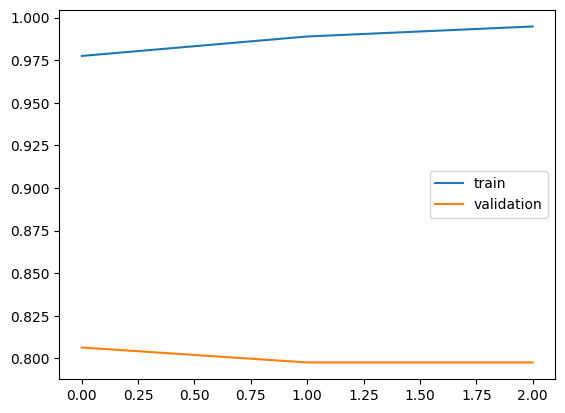

In [59]:
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='validation')
xticks = np.arange(0, 3)

plt.legend()